In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [3]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
data.columns = ['Total', 'East', 'West']
data['Total_calc'] = data.eval('West + East')

In [5]:
data.dropna().describe()

,Total,East,West,Total_calc
count,65678.000000,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076,113.397378
std,144.853108,66.803517,90.358214,144.853108
min,0.000000,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000,14.000000
50%,61.000000,28.000000,30.000000,61.000000
75%,147.000000,69.000000,74.000000,147.000000
max,1097.000000,698.000000,850.000000,1097.000000


In [6]:
%matplotlib inline
import seaborn; seaborn.set()

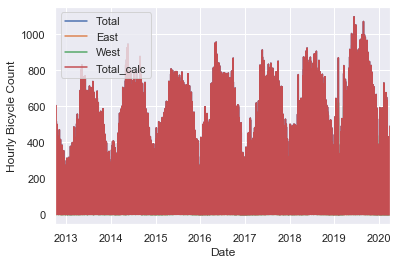

In [7]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

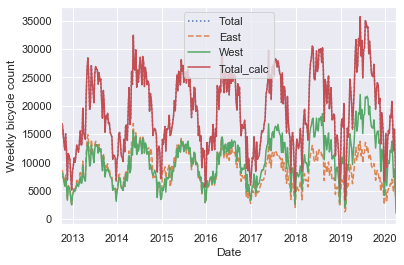

In [8]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

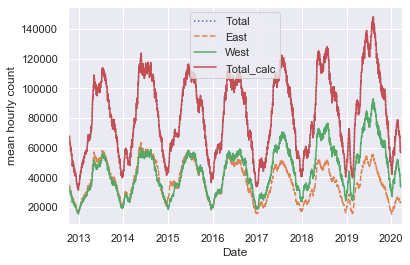

In [9]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

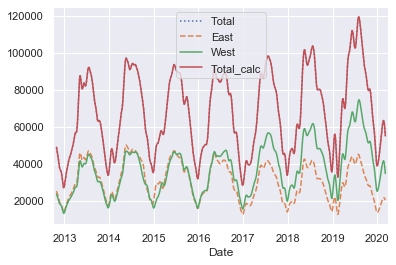

In [10]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

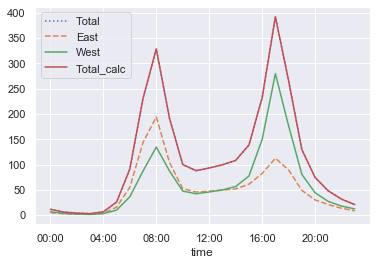

In [11]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

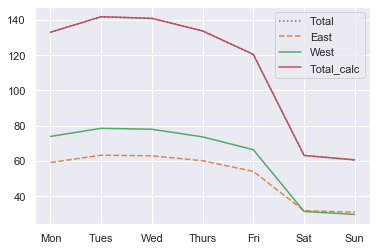

In [12]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [15]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

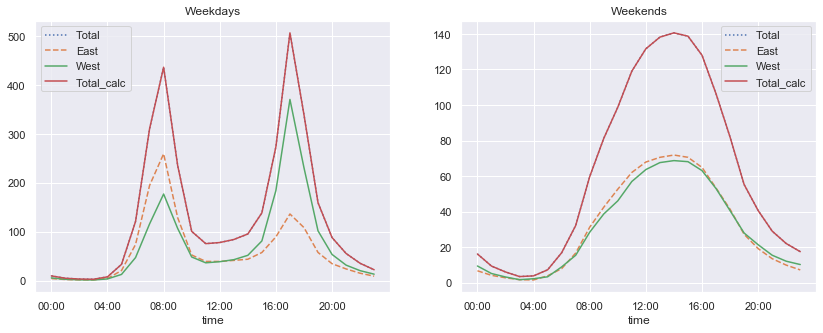

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            xticks=hourly_ticks, style=[':', '--', '-']);